In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [9]:
train_dir = "/kaggle/input/animals-detection-images-dataset/train"
test_dir = "/kaggle/input/animals-detection-images-dataset/test/"
df = pd.read_csv('/kaggle/input/animal-labels/animal_name.csv')

labels = df['animal_name'].tolist()

label_len = len(labels)
print(label_len)

80


In [11]:
# Variables for training data
X = []
Y = []

# Loading data
for label in labels:
    folderpath = os.path.join(train_dir, label)
    
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
        
        if img is not None:
            img = cv.resize(img, (224, 224))
            X.append(np.array(img))
            Y.append(labels.index(label))

# Converting lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)

In [13]:
print("Training data dimensions:")
print("X shape:", X.shape)
print("Y shape:", Y.shape)

Training data dimensions:
X shape: (22566, 224, 224, 3)
Y shape: (22566,)


In [14]:
# Variables for validation data
X_valid = []
Y_valid = []
X_valid_path = []

# Loading data
for label in labels:
    folderpath = os.path.join(test_dir, label)
    
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
        
        if img is not None:
            img = cv.resize(img, (224, 224))
            X_valid.append(np.array(img))
            X_valid_path.append(img_path)
            Y_valid.append(labels.index(label))
            
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

In [15]:
print("\nValidation data dimension:")
print("X_valid shape:", X_valid.shape)
print("Y_valid shape:", Y_valid.shape)


Validation data dimension:
X_valid shape: (6505, 224, 224, 3)
Y_valid shape: (6505,)


In [16]:
total_images = X.shape[0] + X_valid.shape[0]
print("Total numbers of images:", total_images)

Total numbers of images: 29071


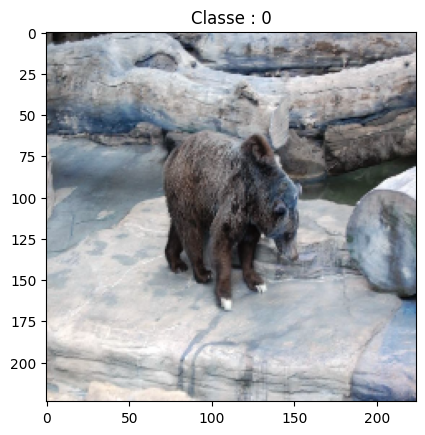

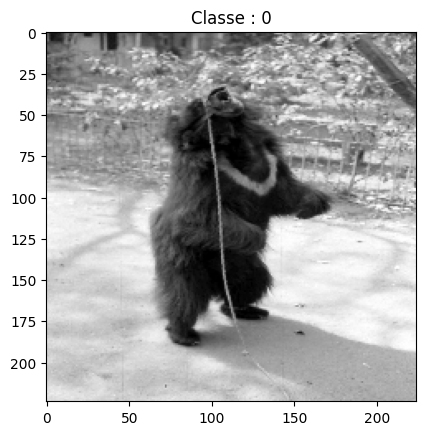

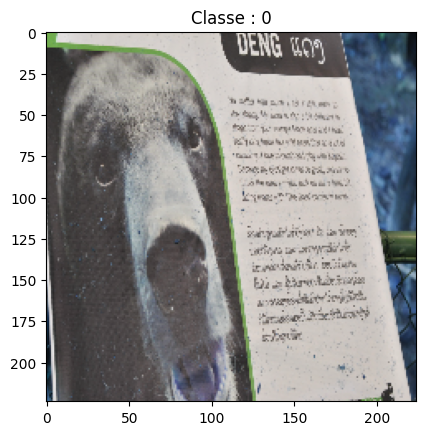

In [17]:
for i in range(3):
    plt.imshow(X[i])
    plt.title(f"Classe : {Y[i]}")
    plt.show()

In [18]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [20]:
base_model.trainable = False

In [22]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)

In [23]:
model = Model(inputs=base_model.input, outputs=predictions)

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Converting labels into one-hot categories
Y_one_hot = to_categorical(Y)
Y_valid_one_hot = to_categorical(Y_valid)

In [27]:
history = model.fit(X, Y_one_hot, epochs=20, validation_data=(X_valid, Y_valid_one_hot))

Epoch 1/20
  3/706 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.0278 - loss: 4.8239       

I0000 00:00:1718386014.116114     567 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718386014.167368     567 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5885 - loss: 1.6335

W0000 00:00:1718386054.939784     564 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


706/706 ━━━━━━━━━━━━━━━━━━━━ 66s 74ms/step - accuracy: 0.5886 - loss: 1.6329 - val_accuracy: 0.7039 - val_loss: 1.0342
Epoch 2/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 61s 55ms/step - accuracy: 0.7787 - loss: 0.7090 - val_accuracy: 0.7176 - val_loss: 1.0217
Epoch 3/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8142 - loss: 0.5412 - val_accuracy: 0.7222 - val_loss: 1.0067
Epoch 4/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8564 - loss: 0.4155 - val_accuracy: 0.7380 - val_loss: 1.0092
Epoch 5/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8726 - loss: 0.3513 - val_accuracy: 0.7371 - val_loss: 1.1417
Epoch 6/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8745 - loss: 0.3463 - val_accuracy: 0.7433 - val_loss: 1.1349
Epoch 7/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8979 - loss: 0.2768 - val_accuracy: 0.7382 - val_loss: 1.1984
Epoch 8/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.9039 - loss: 0.2451 - val_accurac

In [28]:
Y_pred = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_pred, axis=1) 

  5/204 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step

W0000 00:00:1718386853.832083     565 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


204/204 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step


In [30]:
conf_matrix = confusion_matrix(Y_valid, Y_pred_classes)
acc_score = accuracy_score(Y_valid, Y_pred_classes)
print("Precession score:", acc_score)

Precession score: 0.7365103766333589


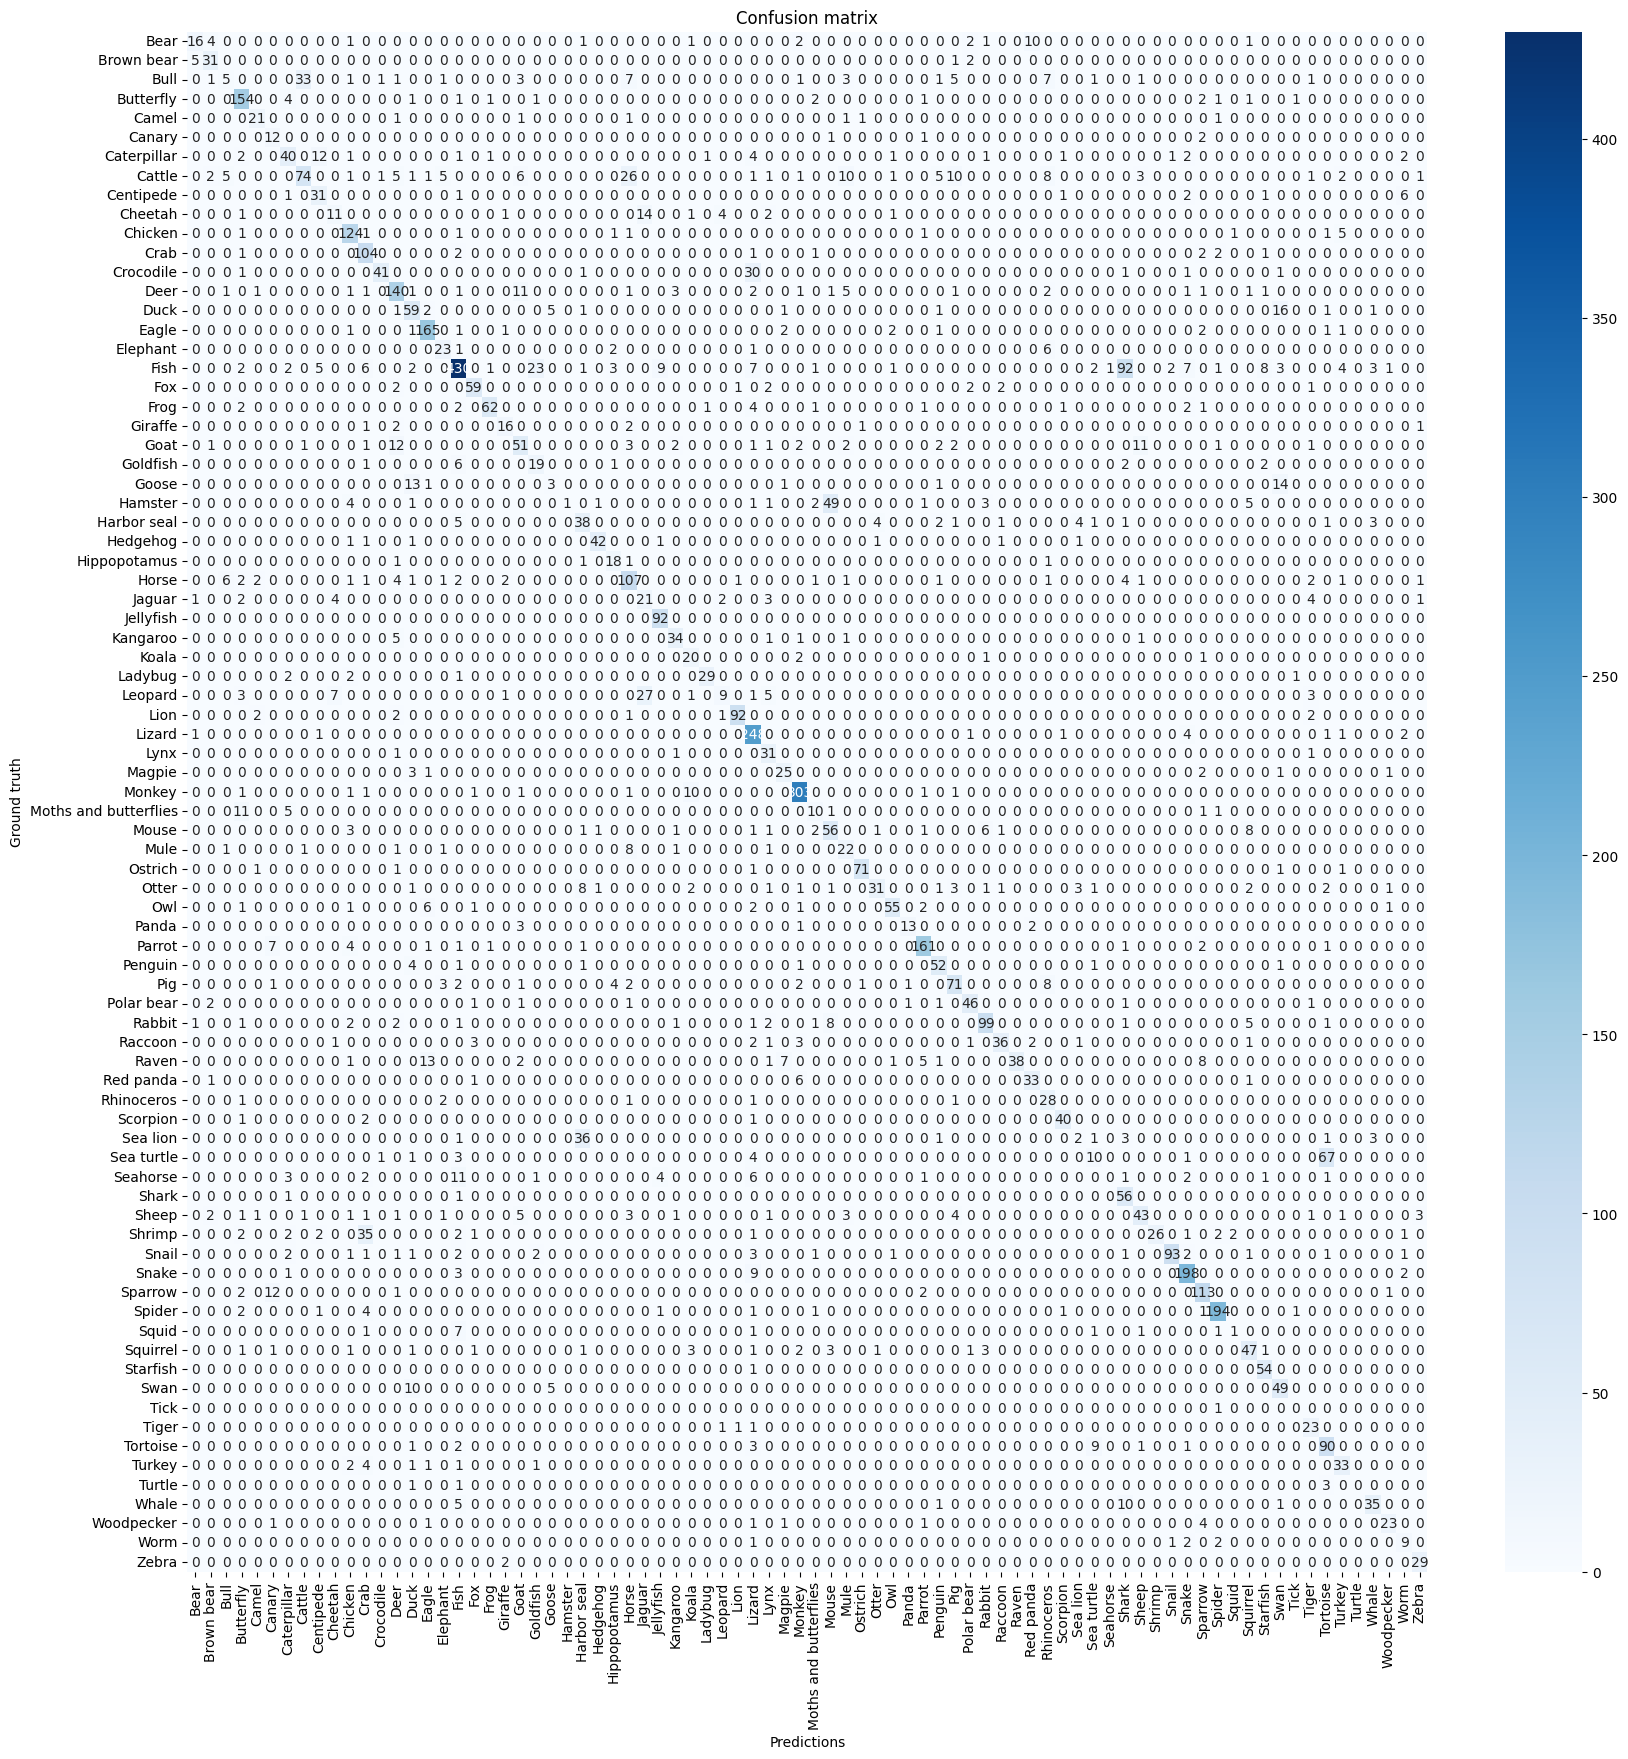

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion matrix')
plt.xlabel('Predictions')
plt.ylabel('Ground truth')
plt.show()

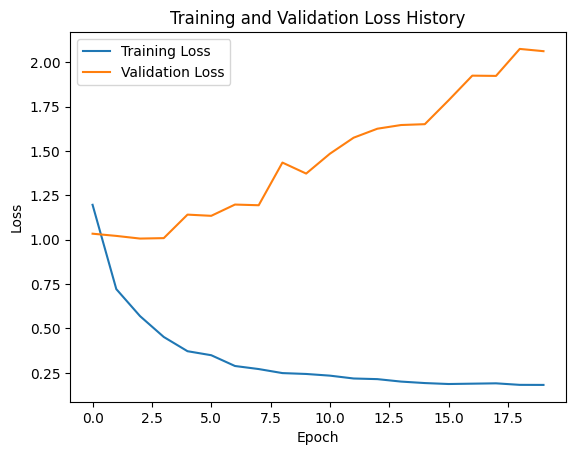

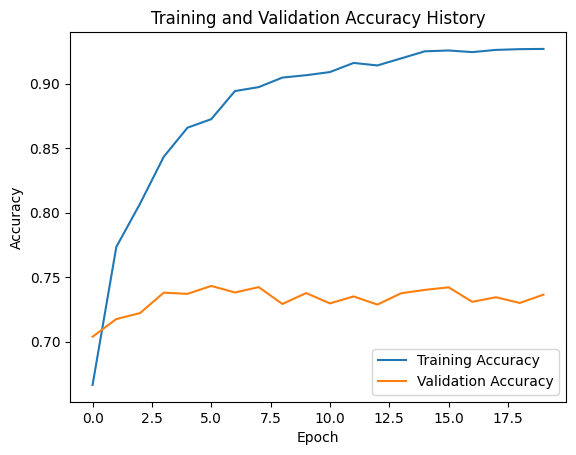

In [32]:
# Viewing loss history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss History')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Viewing Accuracy History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [33]:
report = classification_report(Y_valid, Y_pred_classes, target_names=labels)
print(report)

                       precision    recall  f1-score   support

                 Bear       0.67      0.41      0.51        39
           Brown bear       0.70      0.79      0.75        39
                 Bull       0.28      0.07      0.11        73
            Butterfly       0.79      0.91      0.84       170
                Camel       0.75      0.78      0.76        27
               Canary       0.35      0.75      0.48        16
          Caterpillar       0.63      0.57      0.60        70
               Cattle       0.67      0.43      0.53       171
            Centipede       0.60      0.72      0.65        43
              Cheetah       0.48      0.31      0.38        35
              Chicken       0.80      0.91      0.85       137
                 Crab       0.62      0.91      0.74       114
            Crocodile       0.93      0.54      0.68        76
                 Deer       0.76      0.79      0.78       177
                 Duck       0.56      0.67      0.61  

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
model.save('Animal_Detection_Model_v4.0.h5')